In [1]:
import numpy as np
from scipy.stats import ttest_rel

# Example data: Accuracy scores for 4 models across 4 datasets
# Each model's accuracy on each of the 4 datasets
# Model_Accuracies = [English, Tagalog, Taglish, Mixed]
Regressor_accuracies   = [0.79, 0.76, 0.71, 0.74]
GLS_accuracies         = [0.77, 0.73, 0.73, 0.72]
GES_Concate_accuracies = [0.81, 0.75, 0.75, 0.76]
GES_Average_accuracies = [0.81, 0.78, 0.77, 0.80]

# Function to compute paired t-test for Model 1 vs another model
def compare_model_1(model_1, model_2, model_name_2):
    t_stat, p_value = ttest_rel(model_1, model_2)
    print(f"Comparing Regressor and {model_name_2}:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Reject the null hypothesis: Model 1 and {model_name_2} have significantly different accuracies.\n")
    else:
        print(f"Fail to reject the null hypothesis: No significant difference in accuracy between Model 1 and {model_name_2}.\n")

# Perform paired t-tests comparing Model 1 with Model 2, Model 3, and Model 4
compare_model_1(Regressor_accuracies, GLS_accuracies, "GLS")
compare_model_1(Regressor_accuracies, GES_Concate_accuracies, "GES_Concate")
compare_model_1(Regressor_accuracies, GES_Average_accuracies, "GES_Average")


Comparing Regressor and GLS:
T-statistic: 1.1275, P-value: 0.3416
Fail to reject the null hypothesis: No significant difference in accuracy between Model 1 and GLS.

Comparing Regressor and GES_Concate:
T-statistic: -1.6977, P-value: 0.1881
Fail to reject the null hypothesis: No significant difference in accuracy between Model 1 and GES_Concate.

Comparing Regressor and GES_Average:
T-statistic: -3.4641, P-value: 0.0405
Reject the null hypothesis: Model 1 and GES_Average have significantly different accuracies.



In [2]:
import numpy as np
from scipy.stats import ttest_rel

# Example data: Accuracy scores for 4 models across 4 datasets
# Each model's accuracy on each of the 4 datasets
# Model_Accuracies = [English, Tagalog, Taglish, Mixed]
Regressor_accuracies   = [0.79, 0.76, 0.71, 0.74]
GLS_accuracies         = [0.77, 0.73, 0.73, 0.72]
GES_Average_accuracies = [0.81, 0.75, 0.75, 0.76]
GES_Concate_accuracies = [0.81, 0.78, 0.77, 0.80]

# Function to compute paired t-test for Model 1 vs another model
def compare_model_1(model_1, model_2, model_name_2):
    t_stat, p_value = ttest_rel(model_1, model_2)
    
    # Check if t-statistic is positive (model_2 is better) or negative (model_2 is worse)
    if t_stat > 0:
        p_value /= 2  # One-tailed, divide p-value by 2
    
    print(f"Comparing Regressor and {model_name_2}:")
    print(f"T-statistic: {t_stat:.4f}, One-tailed P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"Reject the null hypothesis: {model_name_2} has significantly better accuracy than Regressor.\n")
    else:
        print(f"Fail to reject the null hypothesis: No significant improvement in accuracy by {model_name_2} over Regressor.\n")

# Perform one-tailed t-tests comparing Regressor to each other model
compare_model_1(Regressor_accuracies, GLS_accuracies, "GLS")
compare_model_1(Regressor_accuracies, GES_Concate_accuracies, "GES_Concat")
compare_model_1(Regressor_accuracies, GES_Average_accuracies, "GES_Average")


Comparing Regressor and GLS:
T-statistic: 1.1275, One-tailed P-value: 0.1708
Fail to reject the null hypothesis: No significant improvement in accuracy by GLS over Regressor.

Comparing Regressor and GES_Concat:
T-statistic: -3.4641, One-tailed P-value: 0.0405
Reject the null hypothesis: GES_Concat has significantly better accuracy than Regressor.

Comparing Regressor and GES_Average:
T-statistic: -1.6977, One-tailed P-value: 0.1881
Fail to reject the null hypothesis: No significant improvement in accuracy by GES_Average over Regressor.



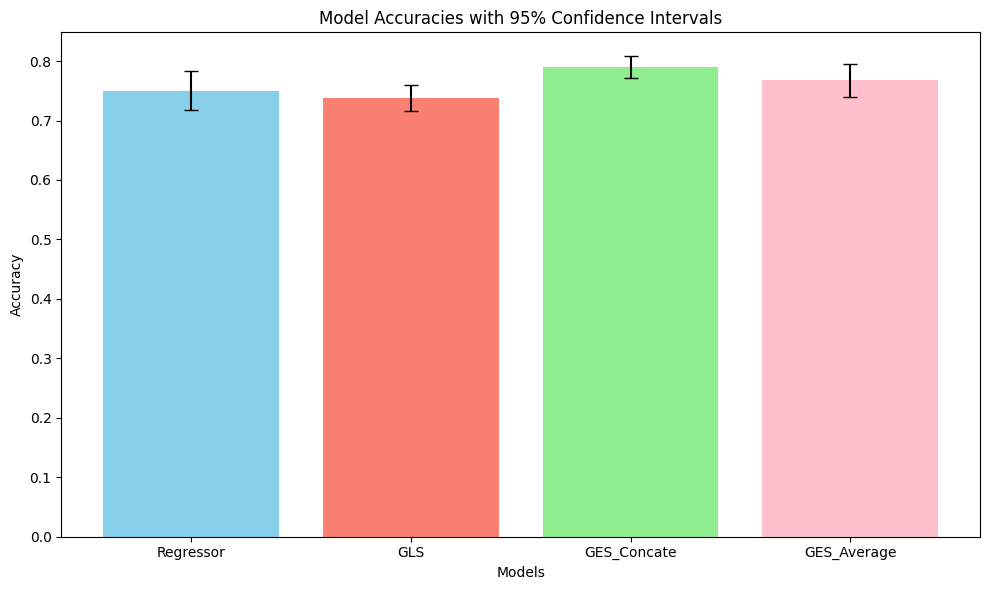

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Define the accuracies for the models
Regressor_accuracies   = [0.79, 0.76, 0.71, 0.74]
GLS_accuracies         = [0.77, 0.73, 0.73, 0.72]
GES_Average_accuracies = [0.81, 0.75, 0.75, 0.76]
GES_Concate_accuracies = [0.81, 0.78, 0.77, 0.80]

# Function to compute confidence intervals (95% CI)
def compute_ci(data):
    mean = np.mean(data)
    ci = 1.96 * sem(data)  # 1.96 for 95% CI assuming normal distribution
    return mean, ci

# Compute means and confidence intervals for each model
models = {
    "Regressor": Regressor_accuracies,
    "GLS": GLS_accuracies,
    "GES_Concate": GES_Concate_accuracies,
    "GES_Average": GES_Average_accuracies
}

means = []
cis = []

for model_name, accuracies in models.items():
    mean, ci = compute_ci(accuracies)
    means.append(mean)
    cis.append(ci)

# Create bar plot with error bars (confidence intervals)
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), means, yerr=cis, capsize=5, color=['skyblue', 'salmon', 'lightgreen', 'pink'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies with 95% Confidence Intervals')
plt.tight_layout()

# Display the plot
plt.show()


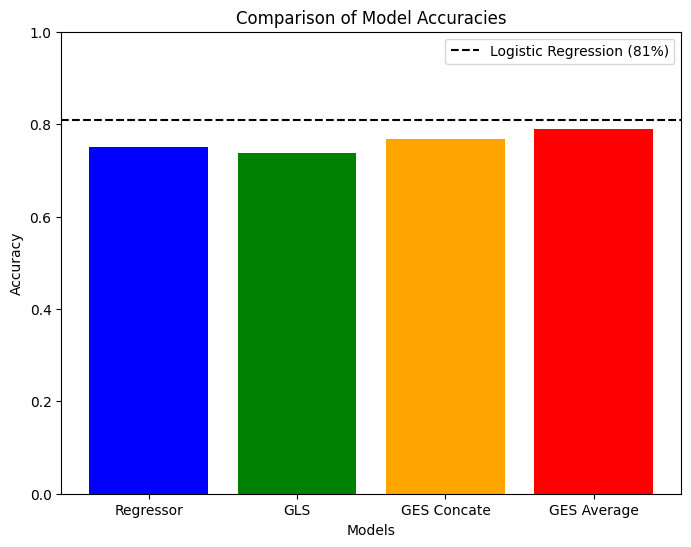

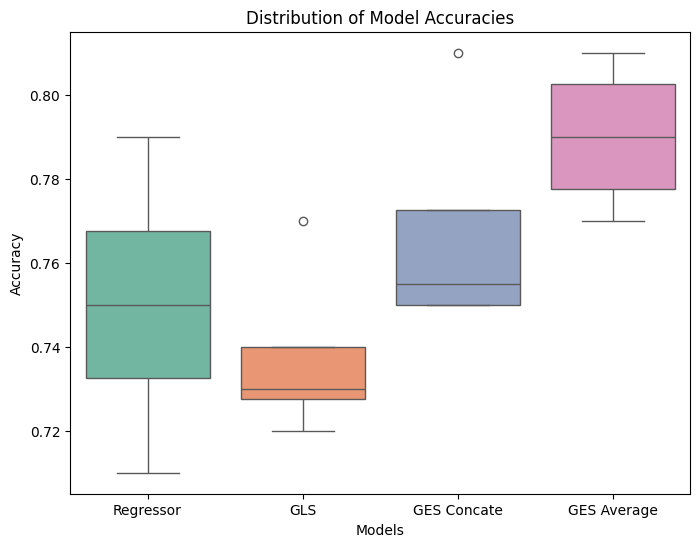

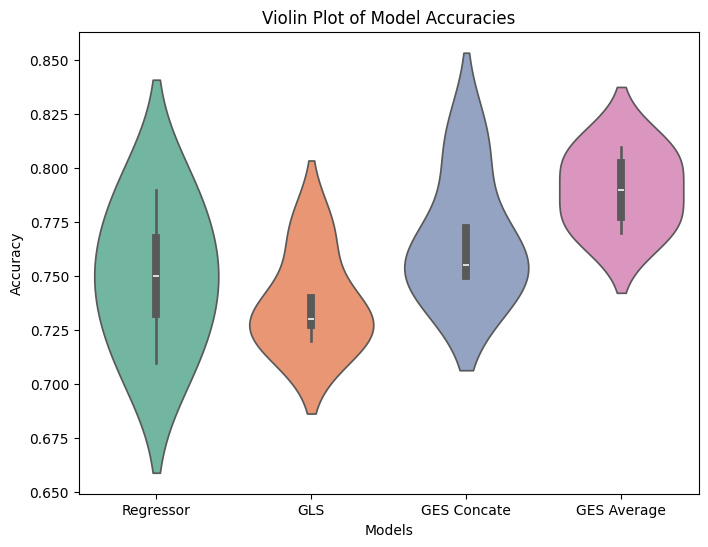

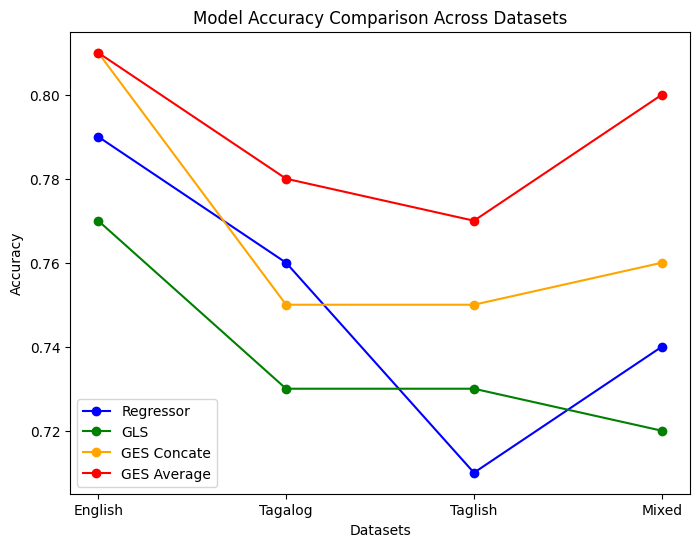

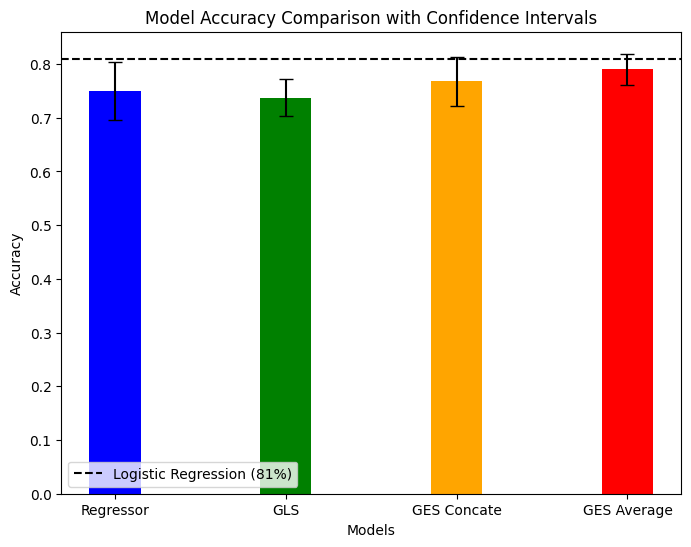

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
import scipy.stats as stats

# Example accuracy data for 4 models across 4 datasets
Regressor_accuracies   = [0.79, 0.76, 0.71, 0.74]
GLS_accuracies         = [0.77, 0.73, 0.73, 0.72]
GES_Concate_accuracies = [0.81, 0.75, 0.75, 0.76]
GES_Average_accuracies = [0.81, 0.78, 0.77, 0.80]

# Dataset names
dataset_names = ['English', 'Tagalog', 'Taglish', 'Mixed']
models = ['Regressor', 'GLS', 'GES Concate', 'GES Average']

# Combined accuracies for box plot and violin plot
all_accuracies = [Regressor_accuracies, GLS_accuracies, GES_Concate_accuracies, GES_Average_accuracies]

# 1. **Bar Plot: Average Accuracy Comparison**
accuracies = [np.mean(Regressor_accuracies), np.mean(GLS_accuracies), 
              np.mean(GES_Concate_accuracies), np.mean(GES_Average_accuracies)]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title("Comparison of Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.axhline(y=0.81, color='black', linestyle='--', label="Logistic Regression (81%)")  # Baseline line
plt.legend()
plt.show()

# 2. **Box Plot: Distribution of Accuracies**
plt.figure(figsize=(8, 6))
sns.boxplot(data=all_accuracies, palette="Set2")
plt.xticks([0, 1, 2, 3], models)
plt.title("Distribution of Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()

# 3. **Violin Plot: Distribution of Accuracies with Density**
plt.figure(figsize=(8, 6))
sns.violinplot(data=all_accuracies, palette="Set2")
plt.xticks([0, 1, 2, 3], models)
plt.title("Violin Plot of Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()

# 4. **Paired Line Plot: Accuracy Comparison Across Datasets**
plt.figure(figsize=(8, 6))
plt.plot(dataset_names, Regressor_accuracies, label="Regressor", marker='o', color='blue')
plt.plot(dataset_names, GLS_accuracies, label="GLS", marker='o', color='green')
plt.plot(dataset_names, GES_Concate_accuracies, label="GES Concate", marker='o', color='orange')
plt.plot(dataset_names, GES_Average_accuracies, label="GES Average", marker='o', color='red')

plt.title("Model Accuracy Comparison Across Datasets")
plt.xlabel("Datasets")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 5. **Bar Plot with Confidence Intervals**
conf_interval_regressor = stats.t.interval(0.95, len(Regressor_accuracies)-1, loc=np.mean(Regressor_accuracies), scale=stats.sem(Regressor_accuracies))
conf_interval_gls = stats.t.interval(0.95, len(GLS_accuracies)-1, loc=np.mean(GLS_accuracies), scale=stats.sem(GLS_accuracies))
conf_interval_ges_concate = stats.t.interval(0.95, len(GES_Concate_accuracies)-1, loc=np.mean(GES_Concate_accuracies), scale=stats.sem(GES_Concate_accuracies))
conf_interval_ges_average = stats.t.interval(0.95, len(GES_Average_accuracies)-1, loc=np.mean(GES_Average_accuracies), scale=stats.sem(GES_Average_accuracies))

# Confidence intervals
conf_intervals = [
    (conf_interval_regressor[1] - np.mean(Regressor_accuracies), np.mean(Regressor_accuracies)),
    (conf_interval_gls[1] - np.mean(GLS_accuracies), np.mean(GLS_accuracies)),
    (conf_interval_ges_concate[1] - np.mean(GES_Concate_accuracies), np.mean(GES_Concate_accuracies)),
    (conf_interval_ges_average[1] - np.mean(GES_Average_accuracies), np.mean(GES_Average_accuracies))
]

# Create a bar plot with confidence intervals
plt.figure(figsize=(8, 6))
bar_width = 0.3
x = np.arange(len(models))

# Create a bar plot with error bars
plt.bar(x, accuracies, bar_width, color=['blue', 'green', 'orange', 'red'], 
        yerr=[conf_intervals[0][0], conf_intervals[1][0], conf_intervals[2][0], conf_intervals[3][0]],
        capsize=5)

plt.axhline(y=0.81, color='black', linestyle='--', label="Logistic Regression (81%)")  # Baseline line
plt.xticks(x, models)
plt.title("Model Accuracy Comparison with Confidence Intervals")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.legend()
plt.show()
